<h1>HW5</h1>

# Question 1
### (Beta Distribution) Complete the following exercises 

### 1.1 

Create a function to calculate the probability density function (PDF) of  beta distribution:

\begin{equation*}
f(x;\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
\end{equation*}


* Function name: pdf_beta

* Input: $\alpha$, $\beta$, x

* Output: f(x;$\alpha$,$\beta$)

* Use SpecialFunctions.gamma() for the gamma function


In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\julia\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\julia\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\julia\.julia\environments\v1.8\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots

In [3]:
function pdf_beta(α,β,x)
    pdf = ((SpecialFunctions.gamma(α+β))/(SpecialFunctions.gamma(α)*SpecialFunctions.gamma(β)))*(x.^(α-1))*(1 .- x)^(β-1)
    return(pdf)
end 

pdf_beta (generic function with 1 method)

### 1.2

1. Create a x from 0 to 1 with increment of 0.001 as the probability of event. 
2. Create $\alpha$ = 0.5 and $\beta$ = 0.5
3. Calculate the pdf of the beta distribution over x 
4. Plot pdf vs. x
5. What is the shape of the beta distribution

In [4]:
import Plots

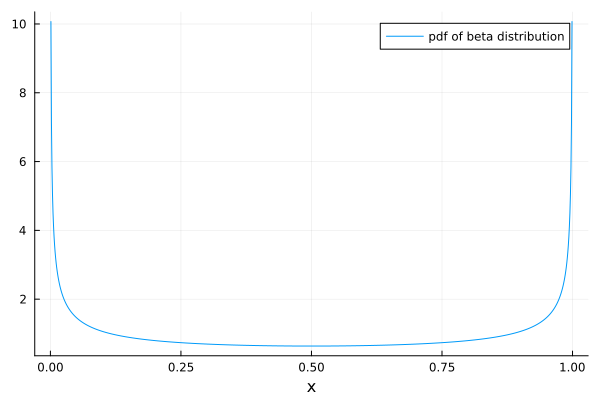

In [5]:
x=collect(0:0.001:1)
α=0.5
β=0.5

# Calculate pdf of beta distribution over x
pdf_betadist=pdf_beta.(α,β,x)

# Plot pdf vs. x
using Plots
plot(x,pdf_betadist,label="pdf of beta distribution", xlabel="x")

The shape of the beta distribution is a "U" shape that is mostly flat on the bottom.

### 1.3

1. Change $\alpha$ = 1 and $\beta$ = 1
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

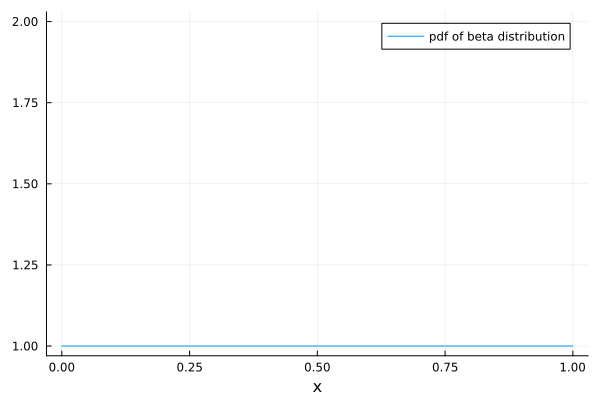

In [6]:
x=collect(0:0.001:1)
α=1
β=1

# Calculate pdf of beta distribution over x
pdf_betadist=pdf_beta.(α,β,x)

# Plot pdf vs. x
using Plots
plot(x,pdf_betadist,label="pdf of beta distribution", xlabel="x")

The graph is a straight horizontal line along where the x axis equals 1. 

### 1.4

1. Change $\alpha$ = 5 and $\beta$ = 5
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

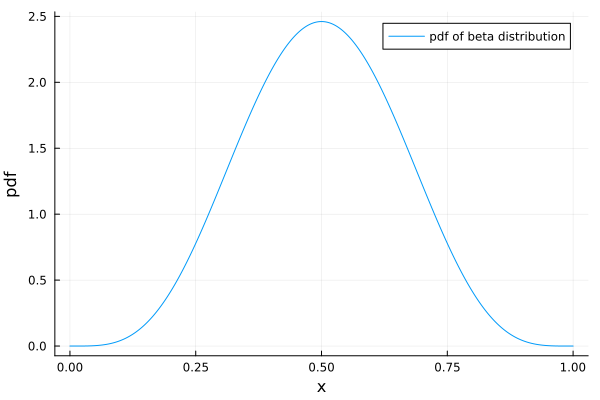

In [7]:
x=collect(0:0.001:1)
α=5
β=5

# Calculate pdf of beta distribution over x
pdf_betadist=pdf_beta.(α,β,x)


# Plot pdf vs. x
using Plots
plot(x,pdf_betadist,label="pdf of beta distribution", xlabel="x", ylabel="pdf")

This graph is a bell curve with the peak of the curve at x=0.5

#### In our class on Tuesday, we went through how a Beta distribution is used as the conjugate prior of a binomial distribution that can be used in bayesian inference. 

If you forgot the derivation, [here is an example](https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb). 

### 1.5

#### Assume we are using the beta distribution from 1.4 as our prior distribution for a coin flipping experiment to calculate the true distribution of flipping the coin (posterior distribution).

Given the experiment results in 35 heads and 65 tails. 

1. Calculate the pdf of the posterior distribution given the prior and the results.
2. Plot pdf of the prior distribution in the same plot
3. Describe how the distribution is changed after the data came in

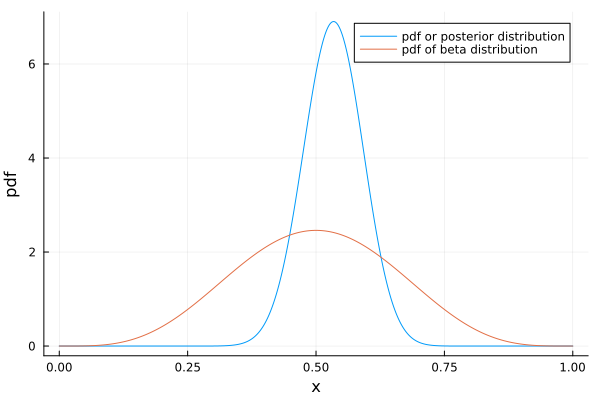

In [10]:
# calculate pdf of posterior distribution given prior and the results
N=65
K=35

posterior = pdf_beta.((K+α), (N-K+β), x)

# plot pdf of prior distribution in same plot
using Plots
plot(x,posterior, label="pdf or posterior distribution")
plot!(x,pdf_betadist,label="pdf of beta distribution", xlabel="x", ylabel="pdf")

After the data is brought in, the peak of the bell curve shifted from x=0.5 to ~x=0.30 on the plot. When the data is brought in, we add the number of acceptances and rejections to alpha and beta, respectively. This makes the range of the distrbution narrower than before. The density is essentially moved.

# Question 2
### (Conjugate Prior) Read the following example and complete the exercises 

#### In question 1, you see when a Beta distribution is used as the prior for a event that follows a binomial distribution (P(B|A)), the posterior distribution (P(A|B)) follows a Beta distribution. Using a conjugate prior simplify the posterior computation by keeping the posterior distribution identical to the prior distribution.


### 2.1 

Gaussian distribution is a conjugate prior of itself. Below is the probability density function of gaussian distribution. Given your likelihood P(Data|Hypothesis) follows N($\mu_1$, $\sigma_1$) and prior P(Hypothesis) follows N($\mu_2$, $\sigma_2$), derive the probability density function of the posterior distribution P(Hypothesis|Data) with updated $\mu$ and $\sigma$. Please show the `whole derivation process` to earn full credit.

\begin{equation*}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
\end{equation*}

*You can ignore the marginal probability during the derivation.

\begin{equation*}
P(A|B) \propto P(B|A)P(A) 
\end{equation*}

### Hint 1
See [this page](https://jupyterbook.org/en/stable/content/math.html) for how to write equations in jupyter notebook

### Hint 2
The posterior probability is gaussian 

### Hint 3
$x^a*x^b = x^{(a+b)}$

Likelihood Probability:

\begin{equation*}
    P(Data|Hypo) =  N(\mu_1, \sigma_1) = f(x) = \frac{1}{\sqrt{2\pi\sigma_1^2}}e^{-\frac{1}{2}(\frac{x-\mu_1}{\sigma_1})^2}
\end{equation*}

Conjugate (hypothesis Prob):

\begin{equation*}
    P(Hypo) =  N(\mu_2, \sigma_2) = f(x) = \frac{1}{\sqrt{2\pi\sigma_2^2}}e^{-\frac{1}{2}(\frac{\mu_1-\mu_2}{\sigma_2})^2}
\end{equation*}

Posterior Probability (Gaussian)

\begin{equation*}
    P(Hypo|Data) =  N(\mu_3, \sigma_3) = f(x) = \frac{1}{\sqrt{2\pi\sigma_3^2}}e^{-\frac{1}{2}(\frac{u_1-\mu_3}{\sigma_3})^2}
\end{equation*}

Trying my best to get derivation:
Try to solve for sigma 3 in terms of the other sigmas
\begin{equation*}
 \sigma_1 ,  \sigma_2
\end{equation*}

\begin{equation*}
{-1\2\pi\sigma_3^2} = {1\2\pi\sigma_2^2} + {1\2\pi\sigma_1^2}
\end{equation*}


### 2.2 

Based on the results you got in 2.1, what normalization factor is needed for the posterior to satisfy $$\int_{-\infty}^{\infty}P(A|B) = 1$$

Noramlization Factor (found in every equation)

\begin{equation*}
    \frac{1}{\sqrt{2\pi\sigma_3^2}}
\end{equation*}